   pregnant  glucose    bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72.0    35        0  33.6     0.627   50      1
1         1       85  66.0    29        0  26.6     0.351   31      0
2         8      183  64.0     0        0  23.3     0.672   32      1
3         1       89  66.0    23       94  28.1     0.167   21      0
4         0      137  40.0    35      168  43.1     2.288   33      1
Training started
Training ended


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


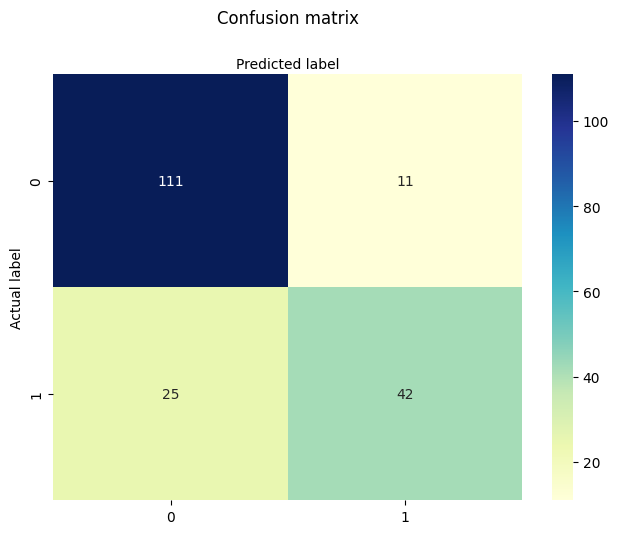

              precision    recall  f1-score   support

 No Diabetes       0.82      0.91      0.86       122
    Diabetes       0.79      0.63      0.70        67

    accuracy                           0.81       189
   macro avg       0.80      0.77      0.78       189
weighted avg       0.81      0.81      0.80       189



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

# Replace missing values with NaN
pima.replace({'?': np.nan}, inplace=True)

# Drop rows with missing values
pima.dropna(inplace=True)

print(pima.head())

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

logreg = LogisticRegression(random_state=16)

print("Training started")
logreg.fit(X_train, y_train)
print("Training ended")

y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = ['0', '1'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

target_names = ['No Diabetes', 'Diabetes']  # Replace with the appropriate class names
print(classification_report(y_test, y_pred, target_names=target_names))
